In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt


c:\Users\dileo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

In [5]:
df = pd.read_csv("data/LetterBox_Reviews_2024_2025.csv", usecols=["film_name", "username", "review_text"])
combined = df.groupby("film_name").agg({
    "review_text": lambda texts: " ".join(str(t) for t in texts)
}).reset_index()


OscarWinners = pd.read_csv("data/OscarWinners.csv")
merged = combined.merge(OscarWinners, how="left", left_on="film_name", right_on="Movie Title")
merged.drop(columns=["Movie Title"], inplace=True)

X = merged["review_text"]
X = model.encode(X)
y = merged["Won"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


KeyboardInterrupt: 

In [19]:
model = make_pipeline(
    CountVectorizer(lowercase=True,strip_accents="unicode",stop_words="english"),
    TfidfTransformer(),
    LogisticRegressionCV() #remember this impooses ridge by default
    #implmement other categorical features through categorical encoder
)

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89        48
         1.0       0.00      0.00      0.00        11

    accuracy                           0.80        59
   macro avg       0.41      0.49      0.44        59
weighted avg       0.66      0.80      0.72        59




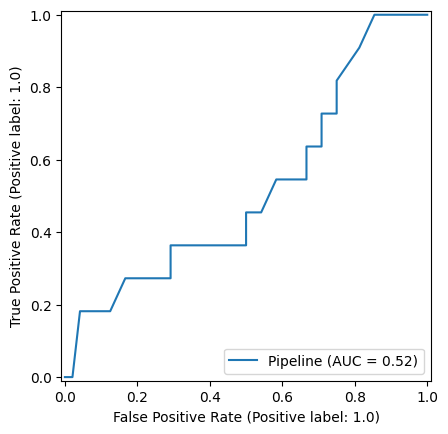

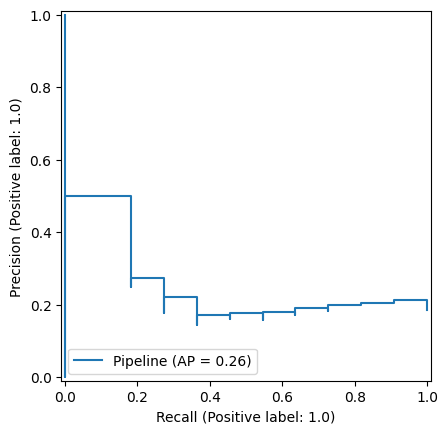

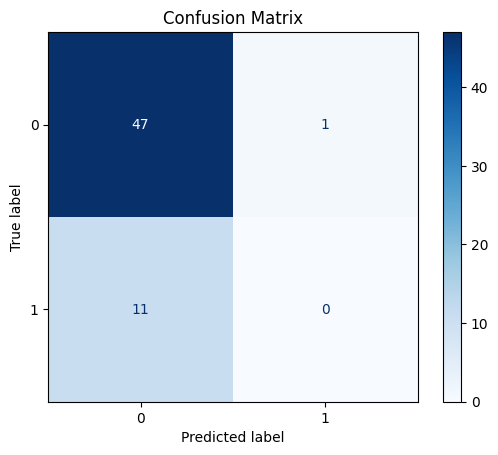

In [20]:

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

RocCurveDisplay.from_estimator(model, X_test, y=y_test)
PrecisionRecallDisplay.from_estimator(model, X_test, y=y_test)

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()